<a href="https://colab.research.google.com/github/Chetan1207/OIBSIP/blob/Unemployment-Analysis/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** UNEMPLOYMENT ANALYSIS

---
**Project Type -** EDA (Exploratory data analysis)

**Contribution -**  Individual

**Name -** Chetan Prakash


# **Project Summary**

---

The analysis of unemployment data involves exploring the relationships between unemployment rates and other economic indicators to gain insights into the drivers of changes in unemployment rates. The data can be analyzed using various techniques such as descriptive statistics, data visualization, and regression analysis to identify patterns and trends in unemployment rates. The insights gained from the analysis can be used to inform business decisions related to hiring, compensation, and workforce planning, as well as policy decisions related to economic development and job growth. The project involves identifying the business objectives of the analysis, selecting the appropriate data sources and analysis techniques, and communicating the results and recommendations to stakeholders. The project aims to provide actionable insights and recommendations to support job growth and economic development.

# **GitHub Link:**

---
https://github.com/Chetan1207/OIBSIP/tree/Unemployment-Analysis


# **Problem Statement**

---
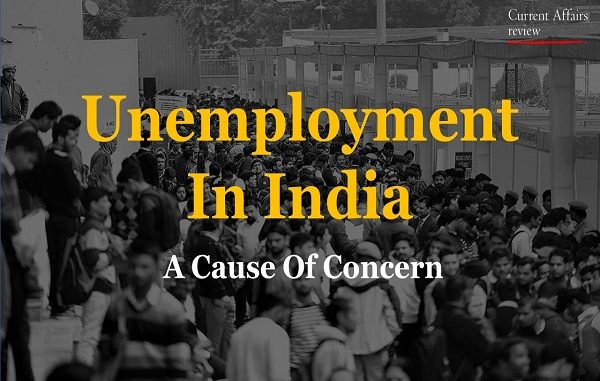


Unemployment rates are a key indicator of economic health, and understanding trends and patterns in unemployment rates can provide valuable insights for businesses and policymakers. The objective of this analysis is to identify the factors that contribute to changes in unemployment rates and to develop strategies and policies to support job growth and economic development. Specifically, this analysis will investigate the relationships between unemployment rates and other economic indicators.

By gaining insights into the drivers of changes in unemployment rates, this analysis aims to provide actionable recommendations for businesses and policymakers to support job growth and economic development.

# *Let's Begin !*

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

## Importing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
filepath='/content/drive/MyDrive/OASIS/Unemployment Analysis EDA/dataset/Unemployment in India.csv'
unemploy=pd.read_csv(filepath)

Mounted at /content/drive


## Know Your Dataset

In [5]:
unemploy

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural
...,...,...,...,...,...,...,...
735,West Bengal,29-02-2020,Monthly,7.55,10871168,44.09,Urban
736,West Bengal,31-03-2020,Monthly,6.67,10806105,43.34,Urban
737,West Bengal,30-04-2020,Monthly,15.63,9299466,41.20,Urban
738,West Bengal,31-05-2020,Monthly,15.22,9240903,40.67,Urban


In [6]:
unemploy.shape

(740, 7)

In [7]:
unemploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    int64  
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [8]:
unemploy.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [9]:
len(unemploy[unemploy.duplicated()]) # Check duplicate values present in dataset

0

## Understanding Your Variable

In [10]:
unemploy.describe(include='all')

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.000000,7.400000e+02,740.000000,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.787946,7.204460e+06,42.630122,NaN
std,NaN,NaN,NaN,10.721298,8.087988e+06,8.111094,NaN
min,NaN,NaN,NaN,0.000000,4.942000e+04,13.330000,NaN
25%,NaN,NaN,NaN,4.657500,1.190404e+06,38.062500,NaN
50%,NaN,NaN,NaN,8.350000,4.744178e+06,41.160000,NaN
75%,NaN,NaN,NaN,15.887500,1.127549e+07,45.505000,NaN


In [11]:
unemploy.columns # check name of the columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
# Check Unique Values for each variable.
for i in unemploy.columns.tolist():
  uni_value = unemploy[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  Region is 28 .
No. of unique values in  Date is 14 .
No. of unique values in  Frequency is 2 .
No. of unique values in  Estimated Unemployment Rate (%) is 624 .
No. of unique values in  Estimated Employed is 740 .
No. of unique values in  Estimated Labour Participation Rate (%) is 626 .
No. of unique values in  Area is 2 .


## Variable Description

**Region -** Indian state where unemployment belong

**Date -** Unemployment according to date

**Frequency -** data according to month

**Estimated Unemployment Rate (%) -** It is the ratio between unemployed labour to total labour

**Estimated Employed -** Number of employed person

**Estimated Labour Participation Rate (%) -** It is the rate where labour actively trying to find out the job or doing job

**Area -** Weather area is belong to city or village

In [13]:
unemploy_1=unemploy.copy() # copy original dataset

# Data Wrangling with visualization charts

In [14]:
unemployment_region= unemploy_1.groupby(['Region','Area'])['Estimated Unemployment Rate (%)'].max().reset_index()
unemployment_region.sort_values('Estimated Unemployment Rate (%)', ascending=False).head()

,Region,Area,Estimated Unemployment Rate (%)
36,Puducherry,Urban,76.74
35,Puducherry,Rural,74.51
22,Jharkhand,Urban,70.17
5,Bihar,Urban,58.77
21,Jharkhand,Rural,55.10


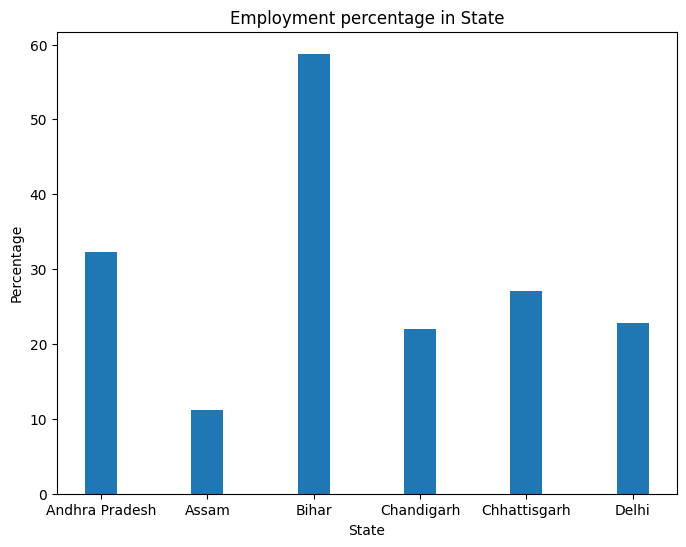

In [15]:
# bar chart
plt.figure(figsize=(8, 6))
plt.bar(unemployment_region['Region'].head(10), unemployment_region['Estimated Unemployment Rate (%)'].head(10), width=0.3)
plt.title('Employment percentage in State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.show()

In [16]:
# plot bar with the help of plotly express library
unemploy_with_time_and_region= px.bar(unemploy_1,x='Region',y='Estimated Unemployment Rate (%)',color='Region',title='Unemployment rate',animation_frame='Date',template='plotly')
unemploy_with_time_and_region.update_layout(xaxis={'categoryorder':'total descending'})
unemploy_with_time_and_region.show()

In [17]:
# Split Date column
unemploy_1['Date']=pd.to_datetime(unemploy_1['Date'])
unemploy_1['year'] = unemploy_1['Date'].dt.year
unemploy_1['month'] = unemploy_1['Date'].dt.month
unemploy_1['day'] = unemploy_1['Date'].dt.day
unemploy_1.drop('Date', axis=1, inplace=True)   # drop original date column

In [18]:
growth=unemploy_1.groupby(['Region', 'Estimated Unemployment Rate (%)','Estimated Labour Participation Rate (%)' ])['year'].max().reset_index()
growth.sort_values('year', ascending=True).head()

,Region,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%),year
260,Jammu & Kashmir,11.32,44.17,2019
340,Kerala,5.52,36.57,2019
339,Kerala,5.35,38.97,2019
338,Kerala,5.35,36.49,2019
337,Kerala,5.00,32.71,2019


In [19]:
Employed_in_region=unemploy_1.groupby(['Region','Area'])['Estimated Employed'].max().reset_index()
Employed_in_region.sort_values('Estimated Employed', ascending=False).head()

,Region,Area,Estimated Employed
49,Uttar Pradesh,Rural,45777509
29,Maharashtra,Rural,26835389
53,West Bengal,Rural,26093009
4,Bihar,Rural,24322330
30,Maharashtra,Urban,17486683


Maximum number of person are employed in U.P. which belong to City area and least in Sikkim from city area.

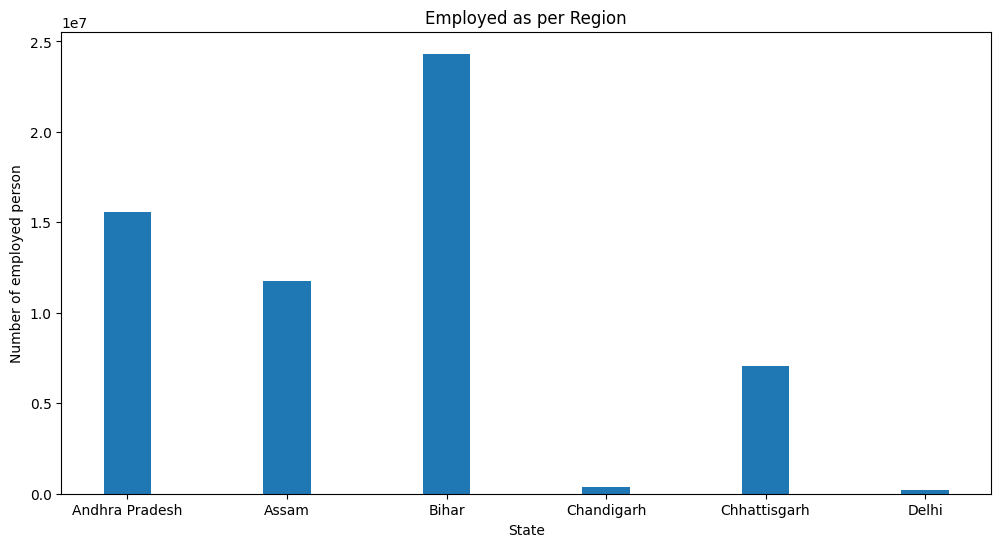

In [26]:
# bar chart
plt.figure(figsize=(12, 6))
plt.bar(Employed_in_region['Region'].head(10), Employed_in_region['Estimated Employed'].head(10), width=0.3)
plt.title('Employed as per Region')
plt.xlabel('State')
plt.ylabel('Number of employed person')
plt.show()

<ipython-input-21-634d407d7ce5>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

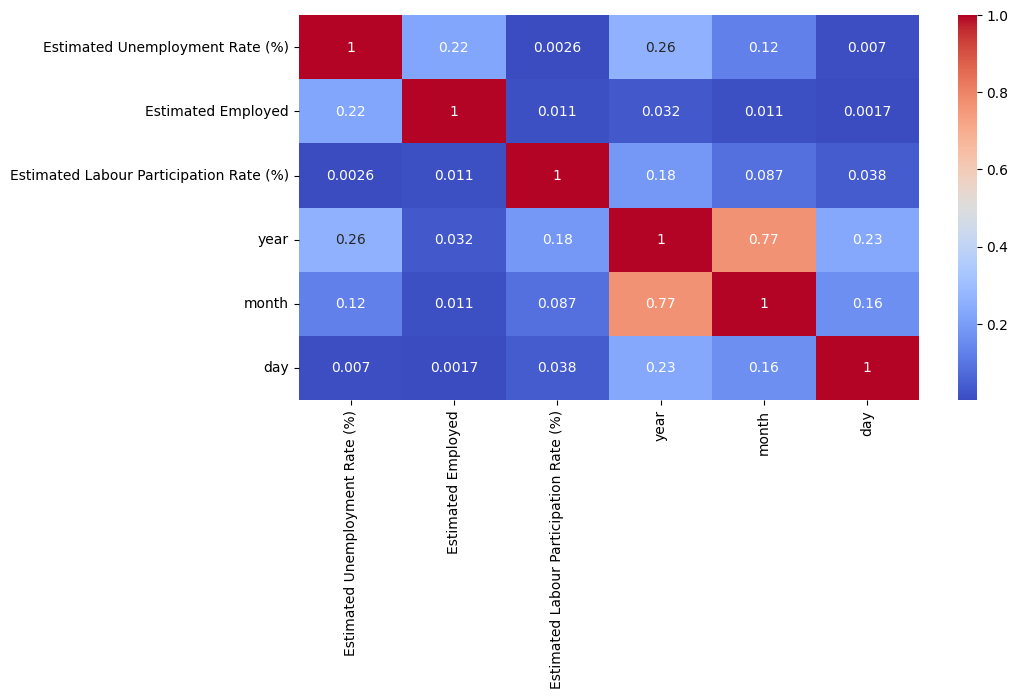

In [21]:
0#  checking Correlation between all the numerical data by heatmap
plt.figure(figsize=(10,5))
correlation = unemploy_1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Multicollinearity present in the dataset between year and month.

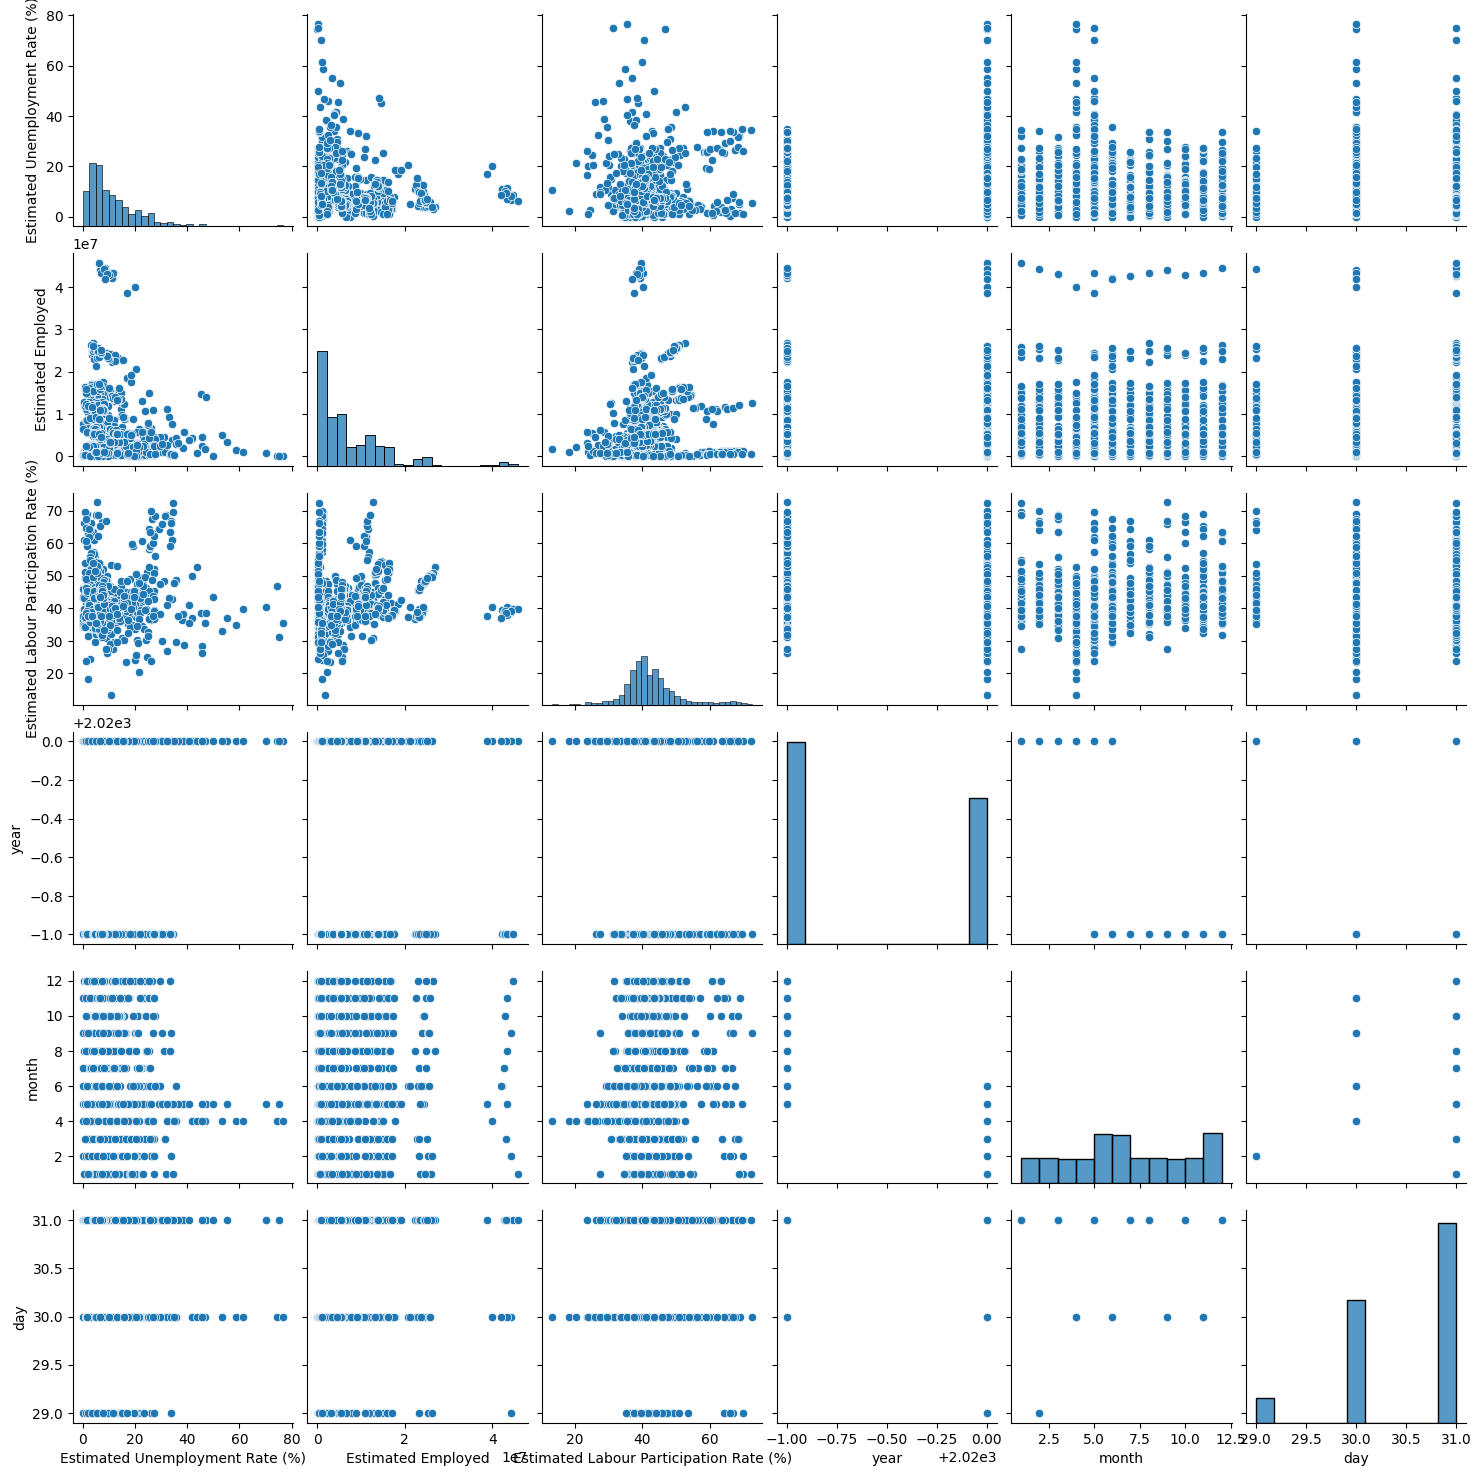

In [22]:
sns.pairplot(unemploy_1)
plt.show()

# Business Objective

---













## EDA Insights:

---



*   Distribution of unemployment rates: By visualizing the distribution of unemployment rates, it's possible to gain insights into the typical range of unemployment rates and the prevalence of high or low unemployment rates.
*   Trends over time: By visualizing the unemployment rates over time, it's possible to identify trends and patterns in the data. For example, it may be possible to identify periods of economic recession or growth based on changes in the unemployment rates.

*   Differences between regions: By comparing the unemployment rates across different regions, it's possible to identify regions that may be struggling economically and regions that may be experiencing economic growth. These insights can be useful for policy makers and businesses looking to make strategic decisions.
*   Differences between industries: By comparing the unemployment rates across different industries, it's possible to identify industries that may be more susceptible to fluctuations in the labor market. These insights can be used to develop targeted policies and programs to support workers in these industries.

*   Maximum number of person are employed in U.P. which belong to City area and least in Sikkim from city area.

